In [13]:
% matplotlib inline

import pandas as pd, numpy as np
import seaborn as sns
import utils.stats as stats
import utils.viz as viz
import statsmodels.formula.api as smf
import utils.viz as viz
from scipy.stats import shapiro
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('poster')

data_dir = '/Users/sabine/workspace/distconnect_macaque/data'

df_r = pd.read_pickle('%s/df_regionwise.pkl' % data_dir)
df_p = pd.read_pickle('%s/df_pairwise.pkl' % data_dir)

In [14]:
df_r = df_r.rename(columns={'injection distance from nearest primary region': "dist_inj_prim",
                            'incoming': "connectivity_distance"})

In [15]:
# exclusions as defned by max distance from primary (see func analysis) and studentized residual

excl_areas_2 = ['10', '11', '13', '14', 
                '24c', '25', '32', '46d', '46v', 
                '9', 'F6', 'OPAI', 'TEpd'] 

fltr_2 = (df_r.area.isin(excl_areas_2) | df_r.connectivity_distance.isnull())

In [18]:
# not injected exclusions

tmp = (df_r.area.isin(excl_areas_2) & df_r.connectivity_distance.isnull())
df_r[tmp].area

64     46v
68      11
76      32
79      F6
82       9
84    OPAI
85      14
86      13
89      25
Name: area, dtype: object

In [4]:
null = smf.ols(formula='connectivity_distance ~ location + region_size', 
               data=df_r[~fltr_2]).fit()

print null.summary()

                              OLS Regression Results                             
Dep. Variable:     connectivity_distance   R-squared:                       0.455
Model:                               OLS   Adj. R-squared:                  0.405
Method:                    Least Squares   F-statistic:                     9.174
Date:                   Sat, 01 Sep 2018   Prob (F-statistic):            0.00127
Time:                           22:39:53   Log-Likelihood:                -65.295
No. Observations:                     25   AIC:                             136.6
Df Residuals:                         22   BIC:                             140.2
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      27.96

In [5]:
model = smf.ols(formula='connectivity_distance ~ location \
                                                 + region_size \
                                                 + dist_inj_prim', data=df_r[~fltr_2]).fit()
print model.summary()

                              OLS Regression Results                             
Dep. Variable:     connectivity_distance   R-squared:                       0.686
Model:                               OLS   Adj. R-squared:                  0.642
Method:                    Least Squares   F-statistic:                     15.32
Date:                   Sat, 01 Sep 2018   Prob (F-statistic):           1.65e-05
Time:                           22:39:56   Log-Likelihood:                -58.381
No. Observations:                     25   AIC:                             124.8
Df Residuals:                         21   BIC:                             129.6
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       

In [6]:
df_r['corrected_condist'] = None
df_r['corrected_condist'][~fltr_2] = null.resid + df_r.connectivity_distance[~fltr_2].mean()

df_r["corrected_condist"] = df_r.corrected_condist.astype('float16')

/Users/sabine/anaconda2/envs/distconnect/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/Users/sabine/anaconda2/envs/distconnect/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


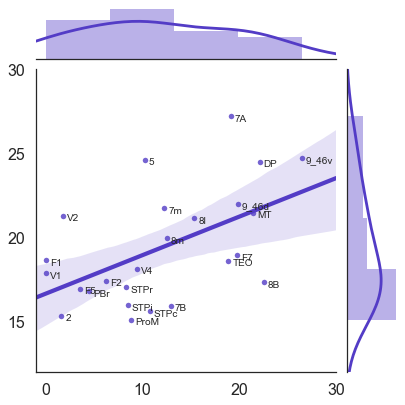

In [7]:
sns.set_style('white')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.4, point['y']-.3, str(point['val']))#, size='xx-small')


g = sns.jointplot(x="dist_inj_prim", 
                  y="corrected_condist", 
                  data=df_r[~fltr_2], 
                  kind='reg', 
                  color="#533cc6", 
                  xlim=(-2,30), 
                  ylim=(13,27),
                  stat_func=None,
                  scatter_kws={"s": 30})


plt.xticks([0,10,20,30])
#plt.yticks([0,10,20,30])
plt.xlim(-1,30)
#plt.xticks([0,5,15,25])
plt.ylim(12,30)
plt.yticks([15, 20, 25, 30])

plt.xlabel('')
plt.ylabel('')


label_point(df_r.dist_inj_prim[~fltr_2], 
            df_r.corrected_condist[~fltr_2], 
            df_r.area[~fltr_2], 
            plt.gca()) 


#g.savefig('/Users/sabine/Downloads/relationship_struct.png', dpi=300)

In [8]:
labels_TEpd = [np.array(df_r[df_r.area=='TEpd'].vertices.iloc[0]),]

In [9]:
labels_pfc = list()

for area in excl_areas_2[:-1]:
    
    labels_pfc += list(np.array(df_r[df_r.area==area].vertices.iloc[0]))
    

    
labels_pfc = [np.array(labels_pfc),]

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


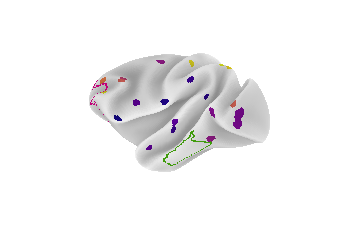

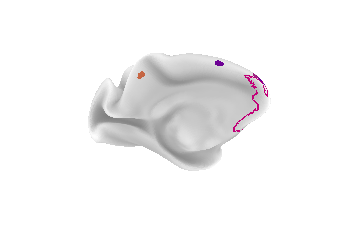

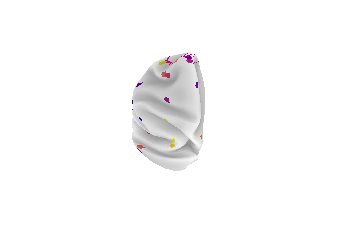

In [12]:
viz.plot_inj_yerkes(df_r, 'corrected_condist', 
                    vmin=15, vmax=25, cmap='plasma', surftype='inflated',
                    views=[(180,0), (0,0), (270,90)],
                    labels=labels_pfc+labels_TEpd,
                    label_cpal=['magenta', 'grass green'],
                    f_save='/Users/sabine/Downloads/struct_condist')